**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

## **1) knn REGRESSION**
a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.


In [1]:
#import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from pprint import pprint
import math
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import math
# from sklearn import svm, preprocessing

In [2]:
# code for knn regression
def read_data(filename):
    data = pd.read_csv(filename)
    return data

def encode(data):
    cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
    clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
    color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
    data['cut'] = data['cut'].map(cut_dict)
    data['clarity'] = data['clarity'].map(clarity_dict)
    data['color'] = data['color'].map(color_dict)
    data = sklearn.utils.shuffle(data, random_state = 20)
    return data

#splitting data
def split_data_into_Xy(data,norm = False):
#     from sklearn.model_selection import train_test_split
    x = data.drop(['price'], axis = 1).values
    y = data['price'].values
    if norm == True:
        x = (x - x.mean()) / x.std() #normalise krna hai yaha
    return x,y

def split_data_into_traintest(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
    return x_train, x_test, y_train, y_test

def shrink_dataset(x_train, x_test, y_train, y_test):
    x_train = x_train[:5000]  
    y_train = y_train[:5000]
    x_test = x_test[:100]
    y_test = y_test[:100]
    return x_train, x_test, y_train, y_test

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return math.sqrt(distance)

from math import sqrt
# calculate manhattan distance
def manhattan_distance(a, b):
	return sum(abs(e1-e2) for e1, e2 in zip(a,b))

def knnregresion(x_test,x_train,num_neighbors, distance_metric):
    distances = []
    predicted_output = []
    for i in range(len(x_test)):
        distances =[]
        for j in range(len(x_train)):
            if distance_metric == 1:
                dist = euclidean_distance(x_test[i], x_train[j])
            elif distance_metric == 2:
                dist = manhattan_distance(x_test[i], x_train[j])

            distances.append([y_train[j], dist])
        distances.sort(key=lambda tup: tup[1])
        
        neighbors = list()
        for i in range(num_neighbors):
            neighbors.append(distances[i][0])

        predicted = sum(neighbors)/len(neighbors)
        predicted_output.append(predicted)
    
    return predicted_output

def MSE(y_predicted,y_test):
    summation = 0 
    n = len(y_test) 
    for i in range (0,n):
        diff = y_test[i] - y_predicted[i]
        squared_diff = diff**2 
        summation = summation + squared_diff
    return summation/n

def MAE(y_predicted,y_test):
    sum_error = 0.0
    for i in range(len(y_test)):
        sum_error += abs(y_predicted[i] - y_test[i])
    return sum_error / float(len(y_test))

def r2score(y_test,y_predicted):
    from sklearn.metrics import r2_score
    return r2_score(y_test,y_predicted)

#compare models
def compare_models(r2_E, r2_M, MAE_E, MAE_M,MSE_E, MSE_M ):
    compare_models = pd.DataFrame( 
        {  'Distance_Metric' : ['Eucledian', 'Manhatten'], 
           'r2Score' : [r2_E, r2_M], 
            'MAE'  : [MAE_E, MAE_M], 
            'MSE'  : [MSE_E, MSE_M] 
        }) 
    print(compare_models)

#plot graph
def plot_graph(kval, r2_list):
    #plot graph for k vs R2 score
    plt.plot(kval, r2_list) 
    plt.xlabel('k') 
    plt.ylabel('R2') 
    plt.title('k vs R2 score') 
    plt.show()


In [3]:
data = read_data('diamonds.csv')
data = encode(data)

In [4]:
X,y = split_data_into_Xy(data)
x_train, x_test, y_train, y_test = split_data_into_traintest(X,y)
x_train, x_test, y_train, y_test = shrink_dataset(x_train, x_test, y_train, y_test)

In [5]:
predicted_eucledian = knnregresion(x_test,x_train,5,1)
r2 = r2_score(y_test,predicted_eucledian)
print(r2)

0.8984868347904134


In [6]:
predicted_manhatten = knnregresion(x_test,x_train,5,2)
r2 = r2_score(y_test,predicted_manhatten)
print(r2)

0.9267125486985287


## 1. b) Do we need to normalise data? [If so Does it make any difference?].


Yes, we need to normalise data so that all the columns have a common scale and no distortion of prediction is present. Data in the columns are of different scales. Some are in 10s, some in 100s, some in 10000s. KNN is a distance based algorithm and this difference in scale might lead to one column dominating the distance computed, which might lead to a bias towards data in one column. So we normalise data

In [7]:
def norm(X):
    X_norm=np.array(X)
    for x in X_norm:
        x[0]=(x[0]-0.2)/(5.01-0.2)
        x[1]=x[1]/5
        x[2]=x[2]/7
        x[3]=x[3]/8
        x[4]=(x[4]-43)/(79-43)
        x[5]=(x[5]-43)/(95-43)
        x[6]=x[6]/10.74
        x[7]=x[7]/58.9
        x[8]=x[8]/31.8
        #print(x)
    X_norm_original = X_norm
    return X_norm

In [8]:
#running knn with normalising and with k as 5 using eucledian distance metric
X,y = split_data_into_Xy(data)
X = norm(X)
x_train, x_test, y_train, y_test = split_data_into_traintest(X,y)
x_train, x_test, y_train, y_test = shrink_dataset(x_train, x_test, y_train, y_test)
predicted_eucledian = knnregresion(x_test,x_train,5,1)
r2 = r2_score(y_test,predicted_eucledian)
print("from eucledian",r2)
predicted_m = knnregresion(x_test,x_train,5,1)
r22 = r2_score(y_test,predicted_m)
print("from manhatten",r22)

from eucledian 0.9495192383457185
from manhatten 0.9495192383457185


## 1. c) Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

done above

## 1. d) Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [9]:
# report a table
MSE_E = MSE(predicted_eucledian,y_test)
MSE_M = MSE(predicted_manhatten,y_test)
MAE_E = MAE(predicted_eucledian,y_test)
MAE_M = MAE(predicted_manhatten,y_test)
r2_E = r2score(y_test,predicted_eucledian)
r2_M = r2score(y_test,predicted_manhatten)

compare_models(r2_E, r22, MAE_E, MAE_M,MSE_E, MSE_M)

error_knn_sc = [sklearn.metrics.mean_squared_error(y_test,predicted_eucledian),
                sklearn.metrics.mean_absolute_error(y_test,predicted_eucledian),
               r2_E]

  Distance_Metric   r2Score       MAE           MSE
0       Eucledian  0.949519   611.906  1.116663e+06
1       Manhatten  0.949519  4904.020  4.296468e+07


## 1. e) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

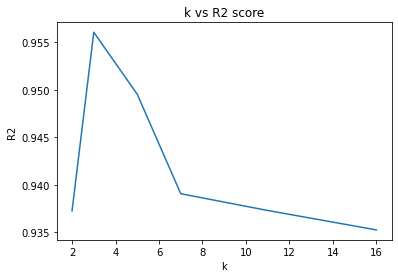

In [10]:
# plot
kval = [2,3,5,7,11,16]
r2_list = []
k_predict_eucledian =[]
for k in kval:
    predicted_eucledian = knnregresion(x_test,x_train,k,1)
    k_predict_eucledian.append(predicted_eucledian)
    r2_list.append(r2_score(y_test,predicted_eucledian))

plot_graph(kval, r2_list)

## 1. f) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [11]:
# Explanation
print(r2_list)

[0.9372709763291709, 0.9560321493415123, 0.9495192383457185, 0.9390717819187191, 0.9373110197477301, 0.9352691306228698]


No, the R-squared values are diiferent for each K. If we choose a small k , then our model is vulnerable to noise but if we choose a large k then the computation time increses so we need to maintain a balance. Generally and odd number less than sqrt(n) is chosen as k.
no the r2 scores are not same. They vary for different values of k because if we choose a small k ,our model is vulnerable to noise but if we choose a large k then the computation time increses so we need to maintain a balance.. Generally and odd number less than sqrt(n) is chosen as k.

* how to select the optimal K value?

    Initialize a random K value and start computing.
    Choosing a small value of K leads to unstable decision boundaries.
    The substantial K value is better for classification as it leads to smoothening the decision boundaries.
    Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.

## 1. g) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [12]:
# scikit-learn KNN Regressor
data = read_data('diamonds.csv')
data = encode(data)
X,y = split_data_into_Xy(data, False)
# X = data.drop(['price'], axis = 1).values
# y = data['price'].values
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
# Subsample the data for more efficient code execution in this exercise
num_training = 48000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print("R2_score using scikit-learn is:",r2_score(y_pred,y_test))
error_knn_sk = [sklearn.metrics.mean_squared_error(y_test,y_pred),
                sklearn.metrics.mean_absolute_error(y_test,y_pred),
                r2_score(y_pred,y_test)]

R2_score using scikit-learn is: 0.9263551535458608


## 1. h) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

done above

## 1. i) From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


Advantages of KNN

1. No Training Period:It does not learn anything in the training period. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling(standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, We need to manually imput missing values and remove outliers.


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


## 2 a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. report and calculate error

In [13]:
data = read_data('diamonds.csv')
data = encode(data)
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
20244,1.52,1,3,4,62.1,66.0,8674,7.33,7.13,4.50
45013,0.54,4,4,4,62.0,58.0,1637,5.21,5.18,3.22
53351,0.70,4,6,4,62.0,60.0,2657,5.70,5.59,3.50
47212,0.59,5,6,4,62.2,58.0,1838,5.35,5.39,3.34
1460,0.86,4,5,2,61.8,58.0,2980,6.12,6.15,3.79
14267,1.34,4,1,4,62.6,58.0,5778,7.08,7.01,4.41
17581,1.20,5,2,6,62.9,55.0,7079,6.75,6.79,4.26
15240,1.33,5,1,5,61.3,57.0,6118,7.11,7.08,4.35
21033,0.31,4,5,4,59.0,59.0,625,4.44,4.47,2.63
1768,0.73,1,7,5,66.0,54.0,3047,5.56,5.66,3.70


In [14]:
X=data[['carat','cut','color','clarity','depth','table','x','y','z']]
Y=data['price']
# whole_data_encoded = encode(whole_data)
# whole_data_encoded.head()
X_norm=np.array(X)
for x in X_norm:
    x[0]=(x[0]-0.2)/(5.01-0.2)
    x[1]=x[1]/5
    x[2]=x[2]/7
    x[3]=x[3]/8
    x[4]=(x[4]-43)/(79-43)
    x[5]=(x[5]-43)/(95-43)
    x[6]=x[6]/10.74
    x[7]=x[7]/58.9
    x[8]=x[8]/31.8
    #print(x)
X_norm_original = X_norm

In [15]:
# X,Y = split_data_into_Xy(whole_data,True)
# X = whole_data.drop(['price'], axis = 1).values
# Y = whole_data['price'].values
X_norm = np.c_[np.ones(X.shape[0]), X_norm]
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size = 0.2)
alpha = 0.01
iterations = 10000
theta = np.zeros(X_norm.shape[1])

In [16]:
def cost_function(x_train, y_train, theta,siz=1000):
    # Matrix math lets use do this without looping
    converge = 0
    sq_error = (siz - converge)**2
    n = y_train.size
    siz = y_train.size + n
    error = np.dot(x_train, theta.T) - y_train
    error += converge
    cost = 1/(2*n) * np.dot(error.T, error)
    return cost, error

def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

def display_graph(cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [17]:
n = y_train.size
error = np.dot(x_train, theta.T) - y_train
initial_cost = 1/(2*n) * np.dot(error.T, error)
print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))
#gradient descent
theta, cost_num = gradient_descent(x_train, y_train, theta, alpha, iterations)
# print(theta)

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], cost error is 15660225.70986281


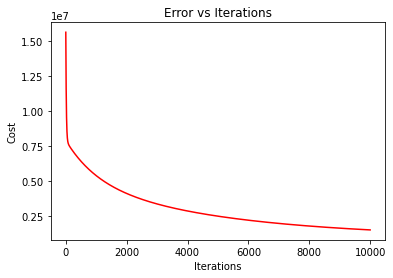

In [18]:
# Display cost chart
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), cost_num, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')
plt.style.use('fivethirtyeight')
plt.show()
# display_graph(cost_num)

In [19]:
final_cost, _ = cost_function(x_train, y_train, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
y_pred0=np.dot(x_test, theta.T)
MSE_lr0 = sklearn.metrics.mean_squared_error(y_test,y_pred0)
MAE_lr0 = sklearn.metrics.mean_absolute_error(y_test,y_pred0)
R2_lr0 = sklearn.metrics.r2_score(y_test,y_pred0)
error_0 =[MSE_lr0, MAE_lr0, R2_lr0]
print()
print("MSE, MAE, R2score respectively {}".format(error_0))

With final theta values of [-4146.90549981 15428.64404031  -424.75869887  -225.2575666
  1167.78361224 -2367.25903653  -800.2088839  13135.24637048
  2395.54392006  2702.60291913], cost error is 1524869.8980739356

MSE, MAE, R2score respectively [3066562.5250150645, 1115.5291792176865, 0.8087475954322331]


## 2 b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.



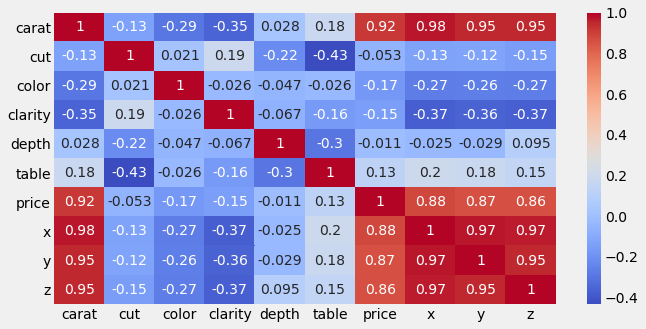

In [20]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

The heat map is generated in the above heatmap cut, color, clarity, depth and table is the least co-realted with price and x,y,z are highly co-related and so least corelated columns have been dropped.

In [21]:
corr_data=[0,6,7,8]
X_norm2 = X_norm_original
X_norm2 = X_norm2[:,corr_data]
X_norm2 = np.c_[np.ones(X_norm2.shape[0]), X_norm2]
X_train,X_test,y_train,y_test=train_test_split(X_norm2,Y,test_size=0.2)

alpha = 0.01
iterations = 10000
theta = np.zeros(X_norm2.shape[1])

In [22]:
n = y_train.size
error2 = np.dot(X_train, theta.T) - y_train
initial_cost2 = 1/(2*n) * np.dot(error2.T, error2)

theta, cost = gradient_descent(X_train, y_train, theta, alpha, iterations)

y_pred_1=np.dot(X_test, theta.T)
MSE = sklearn.metrics.mean_squared_error(y_test,y_pred_1)
MAE = sklearn.metrics.mean_absolute_error(y_test,y_pred_1)
R2 = sklearn.metrics.r2_score(y_test,y_pred_1)
error_1 =[MSE, MAE, R2]
print("MSE, MAE, R2score respectively {}".format(error_1))

MSE, MAE, R2score respectively [3304874.183443677, 1169.2911774699141, 0.8002186951199417]


## 2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [23]:
# import sklearn model
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X_norm2,Y,test_size=0.2)
reg2 = LinearRegression()
reg2.fit(X_train, y_train) #independent variables, target variables
# print(reg2.coef_)
# print(reg2.intercept_)

LinearRegression()

In [24]:
y_pred2 = reg2.predict(X_test)
MSE_lr2 = sklearn.metrics.mean_squared_error(y_test,y_pred2)
MAE_lr2 = sklearn.metrics.mean_absolute_error(y_test,y_pred2)
R2_lr2 = sklearn.metrics.r2_score(y_test,y_pred2)
error_2 =[MSE_lr2, MAE_lr2, R2_lr2]
print("MSE, MAE, R2score respectively {}".format(error_2))

MSE, MAE, R2score respectively [3920375.2123374343, 929.9074031604457, 0.7536810338885769]


## 2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_norm_original,Y,test_size=0.2)
reg3 = LinearRegression()
reg3.fit(X_train, y_train) #independent variables, target variables
# print(reg2.coef_)
# print(reg2.intercept_)
y_pred3 = reg3.predict(X_test)
MSE_lr3 = sklearn.metrics.mean_squared_error(y_test,y_pred3)
MAE_lr3 = sklearn.metrics.mean_absolute_error(y_test,y_pred3)
R2_lr3 = sklearn.metrics.r2_score(y_test,y_pred3)
error_3 =[MSE_lr3, MAE_lr3, R2_lr3]
print("MSE, MAE, R2score respectively {}".format(error_3))

MSE, MAE, R2score respectively [1481362.2566502292, 790.2434101302462, 0.9065529389337502]


In [26]:
error = [error_0, error_1, error_2, error_3]
pd.DataFrame(error,['whole data from scratch','selected data from scratch','selected data from sklearn','whole data from sklearn'],['MSE','MAE','R2'])

,MSE,MAE,R2
whole data from scratch,3.066563e+06,1115.529179,0.808748
selected data from scratch,3.304874e+06,1169.291177,0.800219
selected data from sklearn,3.920375e+06,929.907403,0.753681
whole data from sklearn,1.481362e+06,790.243410,0.906553


## 2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


In [27]:
error2 = [error_0, error_1, error_2, error_3, error_knn_sk, error_knn_sc]
pd.DataFrame(error2,['whole data from scratch','selected data from scratch',
                    'selected data from sklearn','whole data from sklearn',
                   'knn from sklearn','knn from scratch'],['MSE','MAE','R2'])

,MSE,MAE,R2
whole data from scratch,3.066563e+06,1115.529179,0.808748
selected data from scratch,3.304874e+06,1169.291177,0.800219
selected data from sklearn,3.920375e+06,929.907403,0.753681
whole data from sklearn,1.481362e+06,790.243410,0.906553
knn from sklearn,1.202588e+06,539.494000,0.926355
knn from scratch,1.116663e+06,611.906000,0.949519


## 2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


-----1------
------2------
------3------


Text(0, 0.5, 'Price')

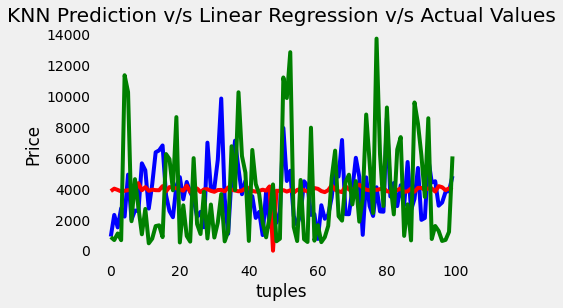

In [28]:
data = read_data('diamonds.csv')
data = encode(data)
X,y = split_data_into_Xy(data)
X = norm(X)
X_train, X_test, y_train, y_test = split_data_into_traintest(X,y)
X_train, X_test, y_train, y_test = shrink_dataset(x_train, x_test, y_train, y_test)
print("-----1------")
predicted_eucledian = knnregresion(X_test,X_train,5,1)
print("------2------")
reg_obj = LinearRegression()
reg_obj.fit(X_train, y_train)
y_pred_lr = reg_obj.predict(X_test)
print("------3------")
plt.plot(range(len(predicted_eucledian)), predicted_eucledian, color ='blue')
plt.plot(range(len(y_pred_lr)), y_pred_lr, color ='red')
plt.plot(range(len(y_test)), y_test, color ='green')
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.title("KNN Prediction v/s Linear Regression v/s Actual Values")
plt.xlabel("tuples")
plt.ylabel("Price")

# **3. KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [29]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [30]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-13 01:47:54--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  2.54MB/s    in 41s     

2021-02-13 01:48:37 (3.94 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [31]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Next we visualize the CIFAR-10 dataset.

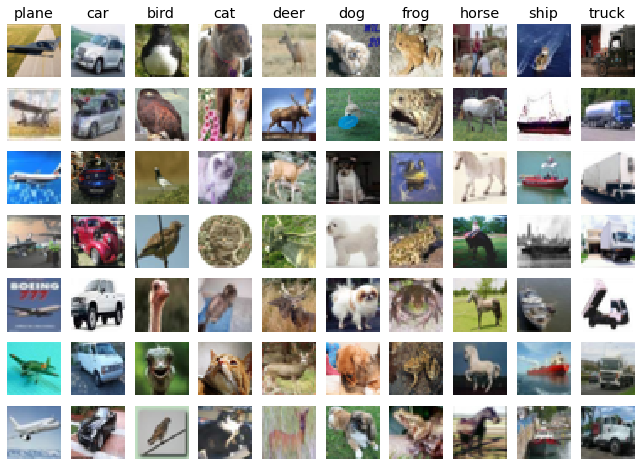

In [32]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### In the next cell we flatten each image into a single dimensional vector so that it is easy to process.

In [33]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5000, 3072) (500, 3072)
(5000,) (500,)


### Implement the main KNearestNeighbor class

In [34]:
import operator
from statistics import *
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def compute_distances_two_loops(self, X_test):
        num_test2 = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test2, num_train))
#         print(dists.shape)
        for i in range(num_test2):
            for j in range(num_train):
                dists[i,j] = np.sqrt(np.sum(np.square(X_test[i,:]-self.X_train[j,:])))
        return dists
    
    def compute_distances_one_loops(self, X_test):
        num_test2 = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test2, num_train))
        for i in range(num_test2):
            dists[i, :] = np.linalg.norm(self.X_train - X_test[i,:], axis = 1)
#             dists[:,i]=np.sqrt(np.square(self.X_train[:,np.newaxis]-X_test[i]).sum(axis=-1)).reshape(-1)
        return dists
    
    def compute_distances_no_loops(self, X_test):
        num_test2 = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test2, num_train))
        dists = np.sqrt((X_test**2).sum(axis=1)[:, np.newaxis] + (self.X_train**2).sum(axis=1) - 2 * X_test.dot(self.X_train.T))
        return dists
        
    def predict_labels(self, dists, k=1):
        y_test_pred = []
        l = len(dists)
#         print(dists.shape)
        for i in range(l):
            temp_list = []
            n = len(dists[i])
            for j in range(n):
                temp_list.append([dists[i][j],self.y_train[j]])
            temp_list.sort(key = operator.itemgetter(*[0]))
            temp_y=[]
            for p in range(k):
                temp_y.append(temp_list[p][1])
            y_test_pred.append(mode(temp_y))
        return y_test_pred

    def __init__(self):
        pass

In [35]:
#this step is a simple memorization of the training data.
classifier = KNearestNeighbor()
#training the model
classifier.train(X_train, y_train)
#computing distance
dists = classifier.compute_distances_two_loops(X_test)
# print(dists[:3])
# print(dists.shape)

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [36]:
# function to predict labels
y_test_pred = classifier.predict_labels(dists, k=1)
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [37]:
# Use this cell to compute accuracies for k = 3, 5, 7
classifier1 = KNearestNeighbor()
classifier1.train(X_train, y_train)
k = [3, 5, 7]
accuracy_k = []
for i in k:
    y_test_pred = classifier1.predict_labels(dists, i)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    accuracy_k.append(accuracy)
print(accuracy_k)

[0.28, 0.29, 0.292]


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [38]:
# Use this cell to call the functions
dists1 = classifier.compute_distances_one_loops(X_test)
dists0 = classifier.compute_distances_no_loops(X_test)
y_test_pred1 = classifier.predict_labels(dists1, k=1)
y_test_pred0 = classifier.predict_labels(dists0, k=1)
# Compute and print the fraction of correctly predicted examples
num_correct1 = np.sum(y_test_pred1 == y_test)
num_correct0 = np.sum(y_test_pred0 == y_test)
accuracy1 = float(num_correct1) / num_test
accuracy0 = float(num_correct0) / num_test
print('For one loop, Got %d / %d correct => accuracy: %f' % (num_correct1, num_test, accuracy1))
print('For no loop, Got %d / %d correct => accuracy: %f' % (num_correct0, num_test, accuracy0))

For one loop, Got 137 / 500 correct => accuracy: 0.274000
For no loop, Got 137 / 500 correct => accuracy: 0.274000


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [39]:
# Use this cell to present your timing results for computing distance matrix
import time as t
k = [1,3,5,7]
time_taken = []
for k_val in k:
    temp_time = []
    temp_time.append(k_val)
    
    start = t.time()
    dists = classifier.compute_distances_two_loops(X_test)
    y_test_pred = classifier.predict_labels(dists, k_val)
    end = t.time()
    temp_time.append(end-start)
    
    start = t.time()
    dists1 = classifier.compute_distances_one_loops(X_test)
    y_test_pred = classifier.predict_labels(dists1, k_val)
    end = t.time()
    temp_time.append(end-start)
    
    start = t.time()
    dists0 = classifier.compute_distances_no_loops(X_test)
    y_test_pred = classifier.predict_labels(dists0, k_val)
    end = t.time()
    temp_time.append(end-start)
    time_taken.append(temp_time)
print(time_taken)
 

[[1, 60.41438937187195, 52.05259728431702, 5.026151180267334], [3, 64.48289394378662, 53.58984160423279, 5.433809757232666], [5, 61.10596823692322, 52.13755702972412, 5.506833791732788], [7, 63.23443579673767, 63.949490547180176, 6.925760269165039]]


In [40]:
import pandas as pd
time_taken_table = pd.DataFrame(time_taken, columns =['k_values','two_loops', 'one_loop','no_loop'])  
print(time_taken_table)

   k_values  two_loops   one_loop   no_loop
0         1  60.414389  52.052597  5.026151
1         3  64.482894  53.589842  5.433810
2         5  61.105968  52.137557  5.506834
3         7  63.234436  63.949491  6.925760


#### As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [41]:
# Use this cell to implement Cross Validation
import numpy as np
from sklearn.model_selection import KFold

classifier2 = KNearestNeighbor()

num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_to_accuracies = {}

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

for k in k_choices:
    k_to_accuracies[k] = []

for k in k_choices:
    print('k=%d' % k)
    for j in range(num_folds):
        # Use all but one folds as our crossval training set
        X_train_crossval = np.vstack(X_train_folds[0:j] + X_train_folds[j+1:])
        # Use the last fold as our crossval test set
        X_test_crossval = X_train_folds[j]
        y_train_crossval = np.hstack(y_train_folds[0:j]+y_train_folds[j+1:])
        y_test_crossval = y_train_folds[j]

        classifier2.train(X_train_crossval, y_train_crossval)
        dists_crossval = classifier2.compute_distances_no_loops(X_test_crossval)
        y_test_pred = classifier2.predict_labels(dists_crossval, k)
        
        num_correct = np.sum(y_test_pred == y_test_crossval)
        accuracy = float(num_correct) / y_test_crossval.shape[0]
        print('Got %d / %d correct => accuracy: %f' % (num_correct, y_test_crossval.shape[0], accuracy))

        k_to_accuracies[k].append(accuracy)


k=1
Got 263 / 1000 correct => accuracy: 0.263000
Got 257 / 1000 correct => accuracy: 0.257000
Got 264 / 1000 correct => accuracy: 0.264000
Got 278 / 1000 correct => accuracy: 0.278000
Got 266 / 1000 correct => accuracy: 0.266000
k=3
Got 257 / 1000 correct => accuracy: 0.257000
Got 263 / 1000 correct => accuracy: 0.263000
Got 273 / 1000 correct => accuracy: 0.273000
Got 282 / 1000 correct => accuracy: 0.282000
Got 270 / 1000 correct => accuracy: 0.270000
k=5
Got 265 / 1000 correct => accuracy: 0.265000
Got 275 / 1000 correct => accuracy: 0.275000
Got 295 / 1000 correct => accuracy: 0.295000
Got 298 / 1000 correct => accuracy: 0.298000
Got 284 / 1000 correct => accuracy: 0.284000
k=8
Got 272 / 1000 correct => accuracy: 0.272000
Got 295 / 1000 correct => accuracy: 0.295000
Got 284 / 1000 correct => accuracy: 0.284000
Got 298 / 1000 correct => accuracy: 0.298000
Got 290 / 1000 correct => accuracy: 0.290000
k=10
Got 272 / 1000 correct => accuracy: 0.272000
Got 303 / 1000 correct => accuracy

In [42]:
from pprint import pprint
pprint(k_to_accuracies)

{1: [0.263, 0.257, 0.264, 0.278, 0.266],
 3: [0.257, 0.263, 0.273, 0.282, 0.27],
 5: [0.265, 0.275, 0.295, 0.298, 0.284],
 8: [0.272, 0.295, 0.284, 0.298, 0.29],
 10: [0.272, 0.303, 0.289, 0.292, 0.285],
 12: [0.271, 0.305, 0.285, 0.289, 0.281],
 15: [0.26, 0.302, 0.292, 0.292, 0.285],
 20: [0.268, 0.293, 0.291, 0.287, 0.286],
 50: [0.273, 0.291, 0.274, 0.267, 0.273],
 100: [0.261, 0.272, 0.267, 0.26, 0.267]}


In [43]:
from statistics import mean
from statistics import stdev
best_k = []
for k in k_to_accuracies.keys():
    best_k.append([mean(k_to_accuracies[k]),stdev(k_to_accuracies[k]),k])
pprint(best_k)
best_k_val = max(best_k)[2]


[[0.2656, 0.007700649323271389, 1],
 [0.269, 0.009565563234854486, 3],
 [0.2834, 0.01375863365309214, 5],
 [0.2878, 0.010305338422390588, 8],
 [0.2882, 0.011256109452204158, 10],
 [0.2862, 0.012457929201917938, 12],
 [0.2862, 0.01584929020492715, 15],
 [0.285, 0.009924716620639588, 20],
 [0.2756, 0.009044335243675995, 50],
 [0.2654, 0.004929503017546499, 100]]


In [44]:
import pandas as pd
show_table = pd.DataFrame(best_k, columns =['average accuracy','standard deviation', 'value of k'])  
print(show_table)
print()
print("Depending on the average accuracy decide on the optimal value of K is", best_k_val)

   average accuracy  standard deviation  value of k
0            0.2656            0.007701           1
1            0.2690            0.009566           3
2            0.2834            0.013759           5
3            0.2878            0.010305           8
4            0.2882            0.011256          10
5            0.2862            0.012458          12
6            0.2862            0.015849          15
7            0.2850            0.009925          20
8            0.2756            0.009044          50
9            0.2654            0.004930         100

Depending on the average accuracy decide on the optimal value of K is 10


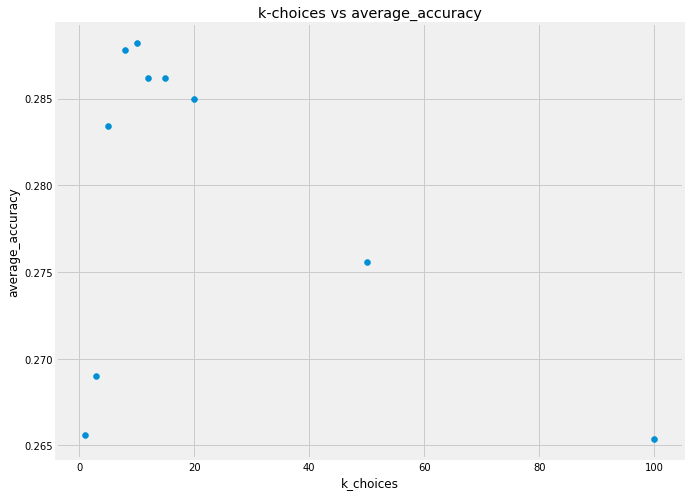

In [45]:
import matplotlib.pyplot as plt
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
average_accuracy = np.array(best_k)[:,0]
standard_deviation = np.array(best_k)[:,1]

x = k_choices
y = average_accuracy
plt.scatter(x, y)
plt.title('k-choices vs average_accuracy')
plt.xlabel('k_choices')
plt.ylabel('average_accuracy')
plt.show()

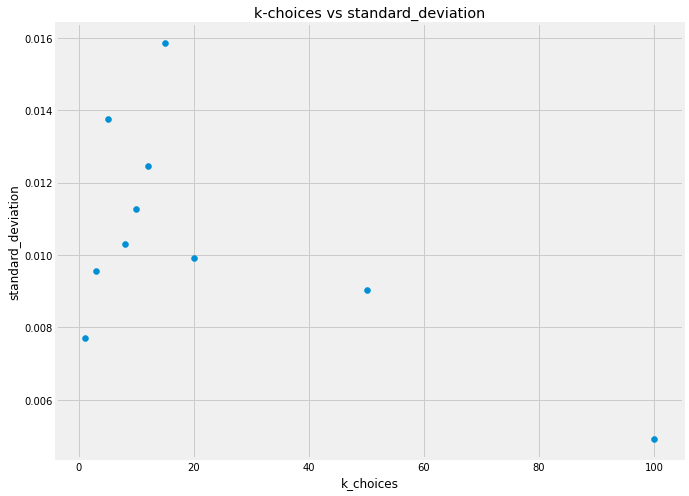

In [46]:
x = k_choices
y = standard_deviation
plt.scatter(x, y)
plt.title('k-choices vs standard_deviation')
plt.xlabel('k_choices')
plt.ylabel('standard_deviation')
plt.show()

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data = data.rename(columns={"Diagnosis":"label"})

In [48]:
# data.describe()
data.head()
# print(data.shape)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,label
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


## 4. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [49]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2)

In [50]:
# https://medium.com/@penggongting/implementing-decision-tree-from-scratch-in-python-c732e7c69aea
pd.options.mode.chained_assignment = None 

class decesion_tree:
    def __init__(self, mode):
        self.mode = mode
        
    def classify_example(self, example, tree):
        question = list(tree.keys())[0]
        feature_name, comparison_operator, value = question.split(" ")

        # ask question
        if comparison_operator == "<=":  # feature is continuous
            answer = tree[question][0] if example[feature_name] <= float(value) else tree[question][1]

        # feature is categorical
        else:
            answer = tree[question][0] if str(example[feature_name]) == value else tree[question][1]

        # base case
        if not isinstance(answer, dict):
            return answer

        # recursively call itself
        else:
            residual_tree = answer
            return self.classify_example(example, residual_tree)
    
    def calculate_accuracy(self,df, tree):

        df["classification"] = df.apply(self.classify_example, axis=1, args=(tree,))
        df["classification_correct"] = df["classification"] == df["label"]
#         pprint(df["classification_correct"])

        accuracy = df["classification_correct"].mean()        
        return accuracy

    #helper functions
    def check_purity(self,data):
        label_column = data[:, -1]
        unique_classes = np.unique(label_column)
        if len(unique_classes) == 1:
            return True
        else:
            return False
        
    def classify_data(self,data):
        label_column = data[:, -1]
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        index = counts_unique_classes.argmax()
        classification = unique_classes[index]
        return classification
    
    def get_potential_splits(self,data):
        potential_splits = {}
        _, n_columns = data.shape
        for column_index in range(n_columns - 1):# excluding the last column which is the label
            potential_splits[column_index] = []
            values = data[:, column_index]
            unique_values = np.unique(values)

            for index in range(len(unique_values)):
                if index != 0:
                    current_value = unique_values[index]
                    previous_value = unique_values[index - 1]
                    potential_split = (current_value + previous_value) / 2

                    potential_splits[column_index].append(potential_split)

        return potential_splits
    
    def split_data(self,data, split_column, split_value):
    
        split_column_values = data[:, split_column]
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

        return data_below, data_above
    
    def calculate_mis(self,data):
        label_column = data[:, -1]
        _, counts = np.unique(label_column, return_counts=True)
        probabilities = counts / counts.sum()
        mis = 1-max(probabilities)
        return mis
    
    def calculate_gini(self,data):
        label_column = data[:, -1]
        _, counts = np.unique(label_column, return_counts=True)
        probabilities = counts / counts.sum()
        gini = 1-sum(probabilities**2)
        return gini
    
    def calculate_entropy(self,data):
        label_column = data[:, -1]
        _, counts = np.unique(label_column, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))
        return entropy
    
    def calculate_overall_entropy(self,data_below, data_above):
        
        n = len(data_below) + len(data_above)
        p_data_below = len(data_below) / n
        p_data_above = len(data_above) / n
        if self.mode == "entropy":
            overall_entropy =  (p_data_below * self.calculate_entropy(data_below) + p_data_above * self.calculate_entropy(data_above))
#             print(overall_entropy)
        elif self.mode == "gini":
            overall_entropy =  (p_data_below * self.calculate_gini(data_below) + p_data_above * self.calculate_gini(data_above))
#             print(overall_entropy)
        elif self.mode == "mis":
            overall_entropy =  (p_data_below * self.calculate_mis(data_below) + p_data_above * self.calculate_mis(data_above))
#             print(overall_entropy)
        return overall_entropy
    
    def determine_best_split(self,data, potential_splits):
        overall_entropy = 9999
        for column_index in potential_splits:
            for value in potential_splits[column_index]:
                data_below, data_above = self.split_data(data, split_column=column_index, split_value=value)
                current_overall_entropy = self.calculate_overall_entropy(data_below, data_above)

                if current_overall_entropy <= overall_entropy:
                    overall_entropy = current_overall_entropy
                    best_split_column = column_index
                    best_split_value = value

        return best_split_column, best_split_value
    
    def decision_tree_algorithm(self,df, counter=0, min_samples=2, max_depth=5):
    # data preparations
        if counter == 0:
            global COLUMN_HEADERS
            COLUMN_HEADERS = df.columns
            data = df.values
        else:
            data = df           
        # base cases
        if (self.check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
            classification = self.classify_data(data)
            return classification
        # recursively call itself
        else:    
            counter += 1

            # helper functions 
            potential_splits = self.get_potential_splits(data)
            split_column, split_value = self.determine_best_split(data, potential_splits)
            data_below, data_above = self.split_data(data, split_column, split_value)

            # instantiate sub-tree
            feature_name = COLUMN_HEADERS[split_column]
            question = "{} <= {}".format(feature_name, split_value)
            f= open("outputimp.txt","w+")
            f.write(feature_name)
            f.close()
            sub_tree = {question: []}

            # find answers (recursion)
            yes_answer = self.decision_tree_algorithm(data_below, counter, min_samples, max_depth)
            f= open("outputimp.txt","w+")
            f.write(str(yes_answer))
            f.close()
            no_answer = self.decision_tree_algorithm(data_above, counter, min_samples, max_depth)
            f= open("outputimp.txt","w+")
            f.write(str(no_answer))
            f.close()

            # If the answers are the same, then there is no point in asking the qestion.
            # This could happen when the data is classified even though it is not pure
            # yet (min_samples or max_depth base cases).
            if yes_answer == no_answer:
                sub_tree = yes_answer
            else:
                sub_tree[question].append(yes_answer)
                sub_tree[question].append(no_answer)
            f= open("outputimp.txt","w")
            f.write(str(no_answer))
            f.close()
            return sub_tree

## 4. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [51]:
dt = decesion_tree("entropy")
tree = dt.decision_tree_algorithm(train_data,max_depth = 10)
# print(tree)
accuracy1 = dt.calculate_accuracy(test_data, tree)
# accuracy1

In [52]:
dt = decesion_tree("gini")
tree = dt.decision_tree_algorithm(train_data,max_depth = 10)
# print(tree)
accuracy2 = dt.calculate_accuracy(test_data, tree)
# accuracy2

In [53]:
dt = decesion_tree("mis")
tree = dt.decision_tree_algorithm(train_data,max_depth = 10)
# print(tree)
accuracy3 = dt.calculate_accuracy(test_data, tree)
# accuracy3

## 4.c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [54]:
accuracy = [accuracy1,accuracy2,accuracy3]
pd.DataFrame(accuracy,['Entropy','Gini index','misclassification error'],['Accuracy'])

,Accuracy
Entropy,0.957143
Gini index,0.921429
misclassification error,0.942857


## 4. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

We have 3 general terminate conditions: 1. All of the tuples in partition belong to the same class i.e the class is pure 
    2.There are no remaining attributes on which the tuples may be further partitioned. 
    3. There are no tuples for a given branch
    4. some other user defined conditions like max depth etc

In above implementation termination condition is when a class is pure or max depth reaches the set value  
The code in function `decision_tree_algorithm` is shown here
``` if (self.check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
            classification = self.classify_data(data)
            return classification ```

## 4. e) Does standardisation and normalisation help in this case? Report

Answer: In decision trees, we are just comparing and branching down the tree, so normalization is not required.

## 4 f) Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data.head()
X = data.drop(['label'], axis = 1).values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
# X_train = train_data.drop(['label'], axis = 1).values
# y_train = train_data['label'].values
# X_test = test_data.drop(['label'], axis = 1).values
# y_test = test_data['label'].values

des_t = DecisionTreeClassifier(random_state=0)
des_t.fit(X_train,y_train)
Y_pred=des_t.predict(X_test)
print("Accuracy using scikit-learn is:",accuracy_score(Y_pred,y_test))
# print("------comparison-------")
accuracy = [accuracy1,accuracy2,accuracy3,accuracy_score(Y_pred,y_test)]
pd.DataFrame(accuracy,['Entropy','Gini index','misclassification error','sklearn'],['comparing Accuracy'])

ValueError: Found input variables with inconsistent numbers of samples: [10, 699]

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

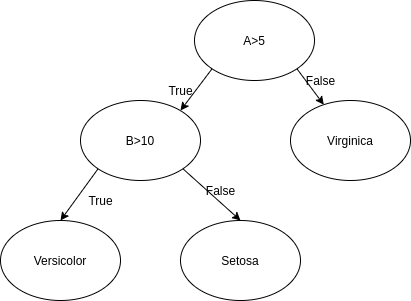
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

highly corelated data are uc size and uc shape so removing them and finding accuracy 

In [ ]:
train_data2 = train_data.drop(['UCSize','UCShape'], axis = 1)
# print(type(train_data2))
dt = decesion_tree("mis")
tree = dt.decision_tree_algorithm(train_data,max_depth = 10)
# print(tree)
accuracy4 = dt.calculate_accuracy(test_data, tree)
print("accuracy after removing highly co related data is " ,accuracy4)

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:

Advantages: 
* normalization or scaling is not required.
* Missing values dont affect the model and prediction.
* A Decision tree model is very intuitive and easy to explain to technical teams as well as people from non technical background.

Disadvantages: 
* Even adding a small amount of data can lead to a big change in the structure of the tree.
* Training time required is quite high.